<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/Alzheimer's_disease_prediction_XGB_%2C_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score ,recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
import xgboost as xgb

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [8]:
df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [10]:
df.shape

(174, 452)

In [11]:
df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [12]:
num_int = sum(df.dtypes == 'int64')
num_object = sum(df.dtypes == 'object')
num_float64 = sum(df.dtypes == 'float64')

print(f"Number of Columns that are  'int': {num_int}")
print(f"Number of Columns that are  'object': {num_object}")
print(f"Number of Columns that are  'float': {num_float64}")

Number of Columns that are  'int': 150
Number of Columns that are  'object': 2
Number of Columns that are  'float': 300


In [13]:
df.isna().sum()


,0
ID,0
air_time1,0
disp_index1,0
gmrt_in_air1,0
gmrt_on_paper1,0
...,...
paper_time25,0
pressure_mean25,0
pressure_var25,0
total_time25,0


In [14]:
object_cols = df.select_dtypes(include='object').columns.tolist()
# print the column names
print(object_cols)

['ID', 'class']


In [15]:
df.drop('ID',axis = 1 , inplace = True)

In [17]:
# Function for checking the nan values
def check_nan_values(df):
    nan_cols = df.columns[df.isna().any()].tolist()
    return nan_cols

# Call the check_nan_values function to get the names of columns with NaN values
nan_cols = check_nan_values(df)

# Print the names of columns with NaN values
print(nan_cols)

[]


In [21]:
# Calculating variance and reataining only variables which capture 80% variance
# Select only numeric features for variance calculation
numerical_df = df.select_dtypes(include=np.number)
variances = numerical_df.var()

threshold = 0.2
low_variance_features = variances[variances <= threshold].index
df_filtered = df.drop(columns=low_variance_features)
df_filtered.shape

(174, 334)

In [22]:
# Separate features and target (if applicable)
X = df_filtered.drop(['class'], axis=1)
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_scaled = mmc.fit_transform(X)

In [23]:
# Perform PCA

pca = PCA(n_components=0.75)
principal_components = pca.fit_transform(X_scaled)
# Create a new DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_filtered['class'] = df_filtered['class'].replace({'H': 0, 'P': 1})
pc_df['class'] = df_filtered['class']

<ipython-input-23-c817c8bf9171>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['class'] = df_filtered['class'].replace({'H': 0, 'P': 1})


In [24]:
pc_df.shape


(174, 38)

In [25]:
from sklearn.model_selection import train_test_split

X = pc_df.drop('class',axis = 1)
y = pc_df['class']
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

Epoch 100/1000, Loss: 0.6915
Epoch 200/1000, Loss: 0.6786
Epoch 300/1000, Loss: 0.6031
Epoch 400/1000, Loss: 0.4603
Epoch 500/1000, Loss: 0.3187
Epoch 600/1000, Loss: 0.2347
Epoch 700/1000, Loss: 0.1907
Epoch 800/1000, Loss: 0.1637
Epoch 900/1000, Loss: 0.1448
Epoch 1000/1000, Loss: 0.1306
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.89      0.85      0.87        20

    accuracy                           0.86        35
   macro avg       0.85      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



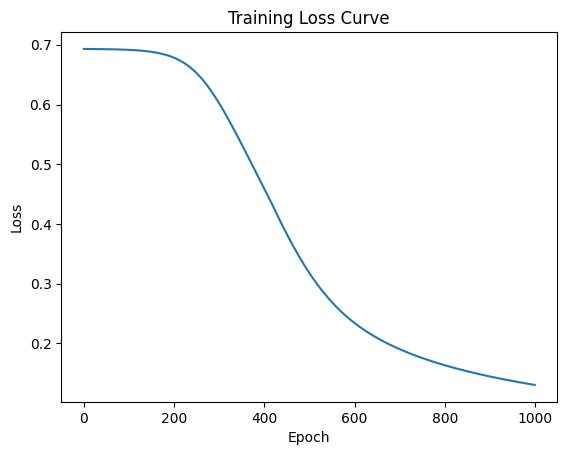

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Neural Network class
class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output, learning_rate):
        # Backward propagation
        m = X.shape[0]

        # Gradients for output layer
        dZ2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        # Gradients for hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate, batch_size=32):
        m = X.shape[0]
        losses = []

        for epoch in range(epochs):
            # Mini-batch gradient descent
            for i in range(0, m, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                # Forward pass
                output = self.forward(X_batch)

                # Backward pass
                self.backward(X_batch, y_batch, output, learning_rate)

            # Compute loss for monitoring
            output = self.forward(X)
            loss = binary_cross_entropy(y, output.flatten())
            losses.append(loss)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

        return losses

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

# Convert data to NumPy arrays if not already
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Initialize and train the model
input_size = X_train_np.shape[1]  # 37 (PCA components)
hidden_size = 16
output_size = 1
nn = CustomNeuralNetwork(input_size, hidden_size, output_size)

# Train with 1000 epochs, learning rate 0.01, batch size 32
losses = nn.train(X_train_np, y_train_np, epochs=1000, learning_rate=0.01, batch_size=32)

# Predict on test set
y_pred = nn.predict(X_test_np)

# Evaluate
print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("Classification Report:\n", classification_report(y_test_np, y_pred))

# Plot loss curve (optional)
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

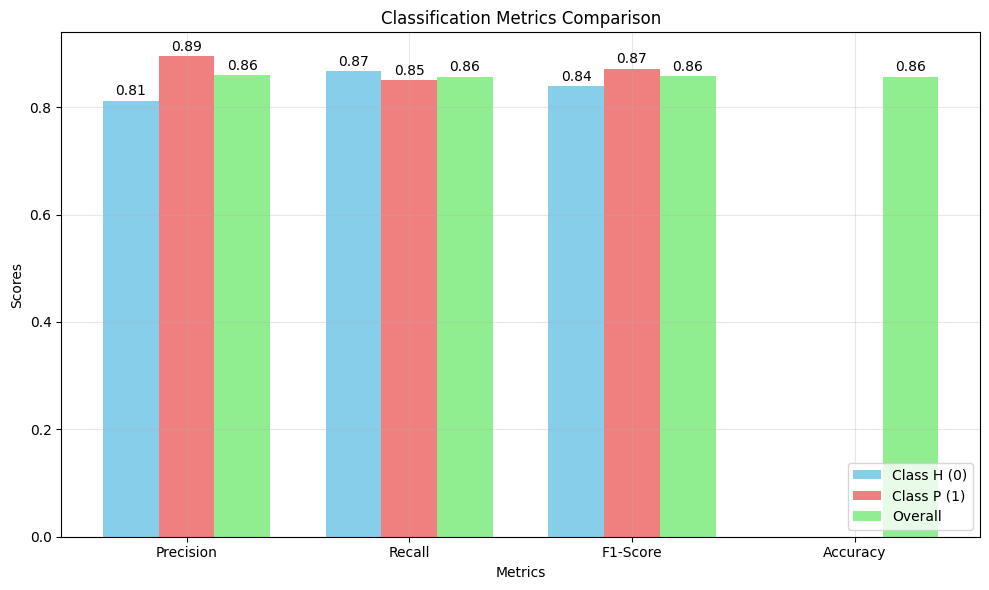

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming your preprocessed data is available (X_train, X_test, y_train, y_test)
# If not, here's a quick recap of your preprocessing (replace with your actual data loading)
# For demonstration, I'll assume you have X, y from your PCA-transformed data

# Condensed Neural Network Code
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output, learning_rate):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs, learning_rate, batch_size=32):
        m = X.shape[0]
        for epoch in range(epochs):
            for i in range(0, m, batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output, learning_rate)

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

# Train the model
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

input_size = X_train_np.shape[1]  # 37
hidden_size = 16
output_size = 1
nn = CustomNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train_np, y_train_np, epochs=1000, learning_rate=0.01, batch_size=32)

# Predict and evaluate
y_pred = nn.predict(X_test_np)
accuracy = accuracy_score(y_test_np, y_pred)
report = classification_report(y_test_np, y_pred, output_dict=True)

# Extract metrics for visualization
metrics = {
    'Class H (0)': {
        'Precision': report['0']['precision'],
        'Recall': report['0']['recall'],
        'F1-Score': report['0']['f1-score']
    },
    'Class P (1)': {
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'], # Changed ' Recall' to 'recall'
        'F1-Score': report['1']['f1-score']
    },
    'Overall': {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }
}

# Prepare data for plotting
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
class_h_metrics = [metrics['Class H (0)']['Precision'], metrics['Class H (0)']['Recall'], metrics['Class H (0)']['F1-Score'], 0]
class_p_metrics = [metrics['Class P (1)']['Precision'], metrics['Class P (1)']['Recall'], metrics['Class P (1)']['F1-Score'], 0]
overall_metrics = [metrics['Overall']['Precision'], metrics['Overall']['Recall'], metrics['Overall']['F1-Score'], metrics['Overall']['Accuracy']]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(labels))
width = 0.25

ax.bar(x - width, class_h_metrics, width, label='Class H (0)', color='skyblue')
ax.bar(x, class_p_metrics, width, label='Class P (1)', color='lightcoral')
ax.bar(x + width, overall_metrics, width, label='Overall', color='lightgreen')

# Customize plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(class_h_metrics):
    if v > 0:
        ax.text(i - width, v + 0.01, f'{v:.2f}', ha='center')
for i, v in enumerate(class_p_metrics):
    if v > 0:
        ax.text(i, v + 0.01, f'{v:.2f}', ha='center')
for i, v in enumerate(overall_metrics):
    if v > 0:
        ax.text(i + width, v + 0.01, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

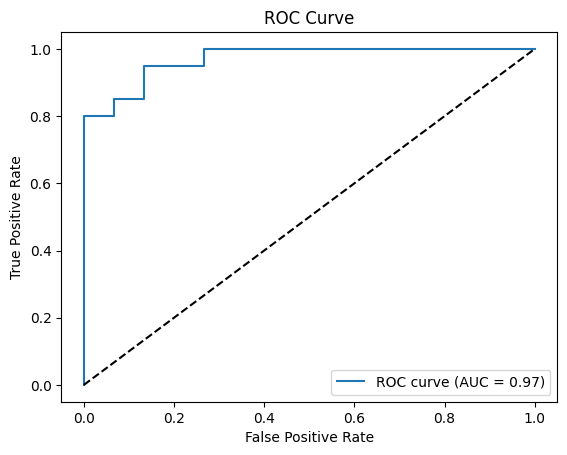

In [33]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = nn.forward(X_test_np).flatten()
fpr, tpr, _ = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

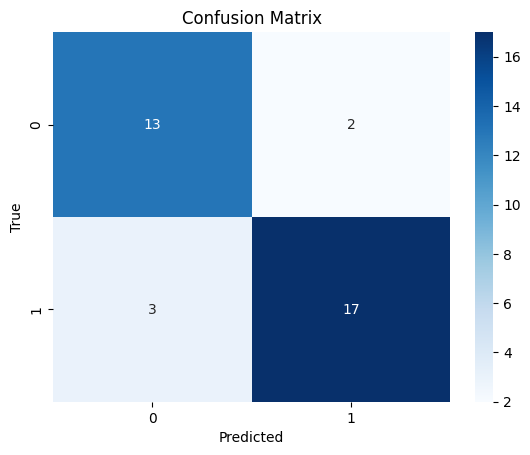

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()